### **Block 1**

In [2]:
#importing the libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## **Block 2**

In [6]:
#load the data
titanic = sns.load_dataset('titanic')

## **Block 3**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


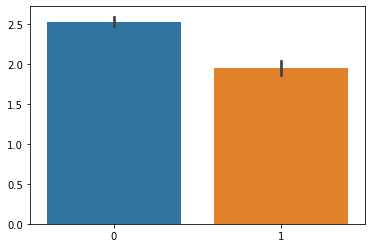

In [9]:
y = np.array(titanic['survived'])
X = np.array(titanic['pclass'])

sns.barplot(y,X)

In [10]:
#do a train and test split
Xtrain,Xtest,ytrain,ytest = train_test_split(X.reshape(len(X),1),y,random_state=1)

In [14]:
#make a decision tree classification
tree_model = tree.DecisionTreeClassifier(max_depth=1) 
#fit the model
tree_model = tree_model.fit(Xtrain, ytrain)

In [15]:
#check the model score/mean accuracy
print(tree_model.score(Xtrain, ytrain))

print(tree_model.score(Xtest, ytest))

0.6751497005988024
0.6457399103139013


In [18]:
#compare ytest to predicted values from model to get confusion matrix
print(tree_model.predict(Xtest))
print('\n')

#check the confusion matrix with metrics
print(metrics.confusion_matrix(ytest,tree_model.predict(Xtest))) 
print('\n')

#compute the F1 score
tn, fp, fn, tp = metrics.confusion_matrix(ytest,tree_model.predict(Xtest)).ravel()
print(tn, fp, fn, tp)
print('\n')


[1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0
 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1
 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1
 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0
 1]


[[84 44]
 [35 60]]


84 44 35 60




[Text(167.4, 163.07999999999998, 'X[0] <= 2.5\ngini = 0.466\nsamples = 668\nvalue = [421, 247]'),
 Text(83.7, 54.360000000000014, 'gini = 0.495\nsamples = 296\nvalue = [133, 163]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.35\nsamples = 372\nvalue = [288, 84]')]

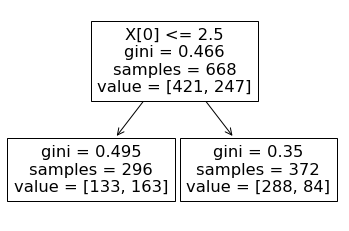

In [19]:
#visualize decision tree model
tree.plot_tree(tree_model)


In [22]:
#predictions for positive class
y_predicted = tree_model.predict_proba(Xtest)[:,1]

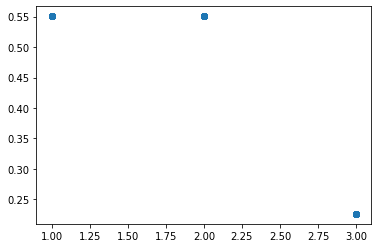

In [23]:
plt.scatter(Xtest,y_predicted)

In [24]:
#use the roc_curve function
fpr,tpr,thresholds = metrics.roc_curve(ytest,y_predicted)

Text(0, 0.5, 'true positive rate')

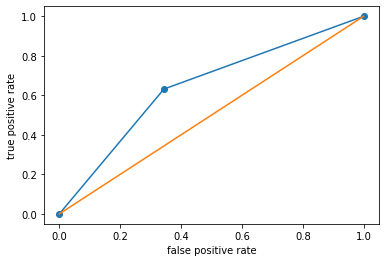

In [25]:
#make ROC plot
plt.plot(fpr,tpr,marker='o')
plt.plot([0,1],[0,1])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

In [27]:
#cacluate the AUC
metrics.roc_auc_score(ytest,y_predicted)

0.6439144736842105

## **Block 4**